In [0]:
import pandas as pd
test_data= pd.read_csv("gmm_data.txt", delimiter=" ",header=None)

In [0]:
import numpy as np
test_data=np.array(test_data)

In [0]:
test_data= np.delete(test_data, -1, axis=1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal
X_train = test_data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=3, covariance_type='spherical', tol=0.001 ,init_params= 'random').fit(X_train) # Instantiate and fit the model
print('Converged:',GMM.converged_) 
means = GMM.means_ 

# Sigma = np.sqrt(GMM.covariances_)
co=GMM.covariances_
Cov=np.array([(co[0]*np.eye(5)),(co[1]*np.eye(5)),(co[2]*np.eye(5))])
Sigma=np.sqrt(co)
Weights= GMM.weights_
print("Means= ",means)
print("Weights= ",Weights)
print("Std Deviations= ", Sigma)

In [0]:
prediction_gmm = GMM.predict(X_train)
X_train1=np.array([X_train[i,:] for i in range(len(prediction_gmm)) if prediction_gmm[i]==0])
X_train2=np.array([X_train[i,:] for i in range(len(prediction_gmm)) if prediction_gmm[i]==1])
X_train3=np.array([X_train[i,:] for i in range(len(prediction_gmm)) if prediction_gmm[i]==2])


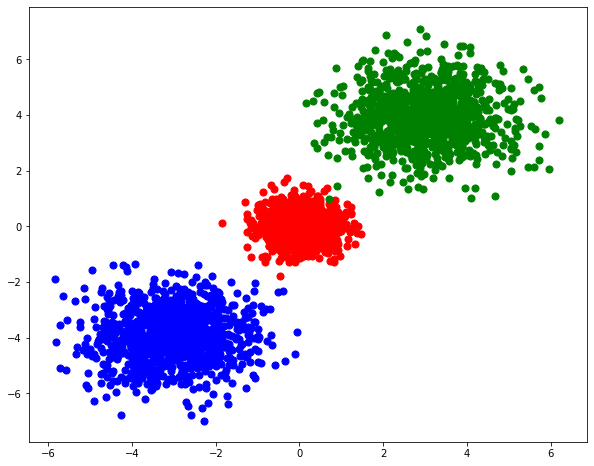

In [0]:
plt.figure(figsize = (10,8))
plt.scatter(X_train1[:, 0], X_train1[:, 1],s=50, color='red')
plt.scatter(X_train2[:, 0], X_train2[:, 1],s=50, color='blue')
plt.scatter(X_train3[:, 0], X_train3[:, 1],s=50, color='green')
plt.show()

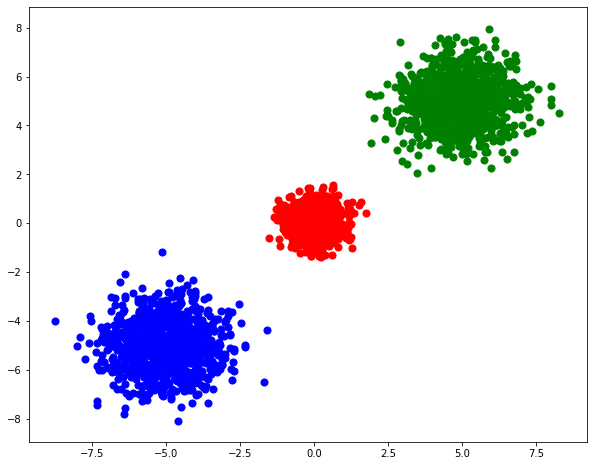

In [0]:
  plt.figure(figsize = (10,8))
  plt.scatter(X_train1[:, 2], X_train1[:, 3],s=50, color='red')
  plt.scatter(X_train2[:, 2], X_train2[:, 3],s=50, color='blue')
  plt.scatter(X_train3[:, 2], X_train3[:, 3],s=50, color='green')
  plt.show()

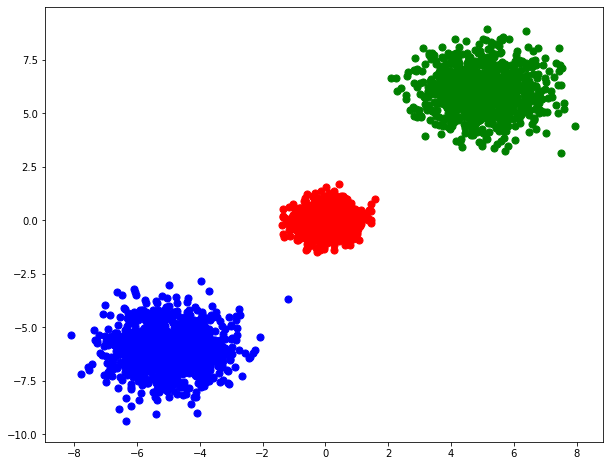

In [0]:
  plt.figure(figsize = (10,8))
  plt.scatter(X_train1[:, 3], X_train1[:, 4],s=50, color='red')
  plt.scatter(X_train2[:, 3], X_train2[:, 4],s=50, color='blue')
  plt.scatter(X_train3[:, 3], X_train3[:, 4],s=50, color='green')
  plt.show()


3.C

In [0]:
class EM:  
    def __init__(self, n_components, n_iter, tol, seed,weights=None,cov=None):
        self.n_components = n_components
        self.n_iter = n_iter
        self.tol = tol
        self.seed = seed
        if weights is not None:
          print('weights given')
          self.weights=weights
        if cov is not None:
          print('covariance given')
          self.covs=cov
    def fit(self, X,known=list()):
        self.n_row, self.n_col = X.shape     
        self.resp = np.zeros((self.n_row, self.n_components))
        np.random.seed(self.seed)
        chosen = np.random.choice(self.n_row, self.n_components, replace = False)
        
        self.means = X[chosen]
       
        if 'weights' not in known:
          self.weights = np.full(self.n_components, 1 / self.n_components)

        
        if 'cov' not in known:          
          shape = self.n_components, self.n_col, self.n_col
          self.covs = np.full(shape, np.cov(X, rowvar = False))
        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      
        
        for i in range(self.n_iter):
            self.Estep(X)
            self.Mstep(X,known)
            
            log_likelihood_new = self._compute_log_likelihood(X)
            print(log_likelihood - log_likelihood_new)
            print("Iteration {}".format(i))
            if (log_likelihood - log_likelihood_new) <= self.tol:
                self.converged = True
                self.means=np.flipud(self.means)
                break
                
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)
            
        return self
      
    def Estep(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood
        

        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return self
 
    def Mstep(self, X,known=list()):
        resp_weights = self.resp.sum(axis = 0)
        if 'weights' not in known:
          self.weights = resp_weights / self.n_row
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        if 'cov' not in known:
          
          for k in range(self.n_components):
              diff = (X - self.means[k]).T
              weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
              self.covs[k] = weighted_sum / resp_weights[k]   
        return self
    
    
    def _compute_log_likelihood(self, X):
        log_likelihood = 0
        for k in range(self.n_components):
            
            weight = self.weights[k]
            mean = self.means[k]
            cov = self.covs[k]
            cov_inverse = np.linalg.inv(cov)
            term_other = np.log(2 * np.pi) + np.log(np.linalg.det(cov))
            
            for x in X:
                diff = x - mean
                term_exponent = np.dot(diff.T, np.dot(cov_inverse, diff))            
                log_likelihood += -1 / 2 * (term_other + term_exponent) + np.log(weight)
            
        return log_likelihood

In [ ]:
em = EM(n_components = 3, n_iter = 400, tol = 0.001, seed = 4,weights=Weights,cov=Cov)
known_vals=['weights','cov']
em.fit(X_train,known=known_vals)
print("Converged = {}".format(em.converged))
print("means= ",em.means)
print("weights= ",em.weights)

In [ ]:
em = EM(n_components = 3, n_iter = 400, tol = 0.001, seed = 4,cov=Cov)
known_vals=['cov']
em.fit(X_train,known=known_vals)
print("Converged = {}".format(em.converged))
print("means= ",em.means)
print("weights= ",em.weights)